In [2]:
#the following are toy datasets
from sklearn import datasets

iris=datasets.load_iris()
x=iris.data
y=iris.target


Section is importing the datasets form sklearn

In [3]:
#importing pandas 
import pandas as pd
#df = pd.read_csv('data.csv')#importing dataset into variable df

df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
#data is now as dataframe in df variable


importing pandas and declaring the df variable

In [4]:
#scikit-learn library makes data as a suitable format
#spliting variables to x and y

X= df.drop(['logS'], axis=1)
#logS is the name of last column and is dropped

y= df.iloc[:,-1]
y= df.logS

Assigning variable to y in two alternative approaches, y=df['logS']  or  y=df.logS

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)


test_size has 20% of the data and remaining 80% is for the training state.

random seed is set to 42.

Training sets (X_train and y_train).
Test set ( X_test and y_test)

1. Model Building: 
    LINEAL REGRESSION 
    * Model Building
This is the traditional linear regression

In [6]:
from sklearn.linear_model import LinearRegression
#importing the linearRegression() function

linearRegression= LinearRegression()
linearRegression.fit(X_train, y_train)
#the fit() function performs the actual model training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_linearRegression_train_prediction = linearRegression.predict(X_train)
y_linearRegression_test_prediction = linearRegression.predict(X_test)

As we can see in the above code, the model (linearRegression) is applied to make predictions via the linearRegression.predict() function on the training set and test set.

2. Model Performance:
    for calculating the performance metrics so to determine the model performance

In [8]:
#importing mean_squared_error and r2_score from sklearn.metrics library to compute the performance metrics
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error (y_train, y_linearRegression_train_prediction)
lr_train_r2 = r2_score(y_train, y_linearRegression_train_prediction)

lr_test_mse = mean_squared_error(y_test, y_linearRegression_test_prediction)
lr_test_r2 = r2_score(y_test, y_linearRegression_test_prediction)


In [9]:
print(lr_train_mse)
print(lr_train_r2)
print(lr_test_mse)
print(lr_test_r2)

1.0139894491573003
0.7695127746587307
0.9990844407075306
0.7705650058569232


In [10]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns =['Method','Training MSE', 'Training R2', 'Test MSE','Test R2']


In [11]:
#print(lr_results)
pd.concat([lr_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.01399,0.769513,0.999084,0.770565


3. Random Forest: RF COMBINES THE PREDICTIONS OF SEVERAL DECISION TREES. Great feature is the GIni index
    values that it produces fro constructed models.
 .   

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(max_depth = 2, random_state = 42)
rf.fit(X_train, y_train)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [15]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

pd.concat([rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.04579,0.762284,1.03683,0.761896



.

3. Other machine learning algorithms

To build models using other machine learning algorithms (aside from sklearn.ensemble.RandomForestRegressor that we had used above), we need only decide on which algorithms to use from the available regressors (i.e. since the dataset’s Y variable contain categorical values).

    List of Regressors
    

Let’s take a look at some example regressors that we can choose from:

sklearn.linear_model.Ridge

sklearn.linear_model.SGDRegressor

sklearn.ensemble.ExtraTreesRegressor

sklearn.ensemble.GradientBoostingRegressor

sklearn.neighbors.KNeighborsRegressor

sklearn.neural_network.MLPRegressor

sklearn.tree.DecisionTreeRegressor

sklearn.tree.ExtraTreeRegressor

sklearn.svm.LinearSVR

sklearn.svm.SVR

In [16]:
#using the sklearn.tree.ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor(random_state = 42)
et.fit(X_train, y_train)

#fit()function is how we subject the variable to data training

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=42, splitter='random')

In [17]:
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.01399,0.769513,0.999084,0.770565
0,Random forest,1.04579,0.762284,1.03683,0.761896


Text(0.5, 0, 'Experimental LogS')

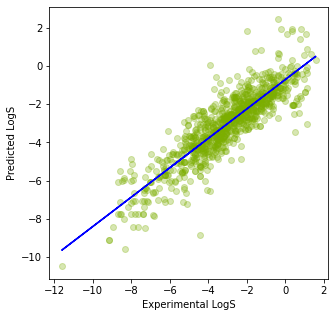

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_linearRegression_train_prediction, c="#7CAE00", alpha = 0.3)

z= np.polyfit(y_train,y_linearRegression_train_prediction, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), "#0000FF")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')